<a href="https://colab.research.google.com/github/Meghanakandula-3/Shadowfox/blob/main/LanguageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets matplotlib seaborn


In [ ]:
from transformers import pipeline, AutoModelForMaskedLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [ ]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer)


Device set to use cpu


In [ ]:
# Example 1
fill_mask("The capital of France is [MASK].")

# Example 2
fill_mask("Machine learning is a [MASK] field of computer science.")


[{'score': 0.1529024839401245,
  'token': 3141,
  'token_str': 'related',
  'sequence': 'machine learning is a related field of computer science.'},
 {'score': 0.10743853449821472,
  'token': 7772,
  'token_str': 'specialized',
  'sequence': 'machine learning is a specialized field of computer science.'},
 {'score': 0.10363753885030746,
  'token': 2470,
  'token_str': 'research',
  'sequence': 'machine learning is a research field of computer science.'},
 {'score': 0.0866357758641243,
  'token': 9373,
  'token_str': 'theoretical',
  'sequence': 'machine learning is a theoretical field of computer science.'},
 {'score': 0.06960881501436234,
  'token': 2350,
  'token_str': 'major',
  'sequence': 'machine learning is a major field of computer science.'}]

In [ ]:
fill_mask("The [MASK] barked loudly at the mailman.")
fill_mask("She felt [MASK] after her long run.")


[{'score': 0.6015165448188782,
  'token': 2488,
  'token_str': 'better',
  'sequence': 'she felt better after her long run.'},
 {'score': 0.03116009756922722,
  'token': 2204,
  'token_str': 'good',
  'sequence': 'she felt good after her long run.'},
 {'score': 0.02556717023253441,
  'token': 5458,
  'token_str': 'tired',
  'sequence': 'she felt tired after her long run.'},
 {'score': 0.018407931551337242,
  'token': 9069,
  'token_str': 'exhausted',
  'sequence': 'she felt exhausted after her long run.'},
 {'score': 0.013261493295431137,
  'token': 5475,
  'token_str': 'calm',
  'sequence': 'she felt calm after her long run.'}]

1. How accurately does BERT predict masked tokens in varied domains (e.g., medical, legal)?
2. Does BERT understand context better when more words are provided?
3. How does BERT handle ambiguity in sentences with multiple meanings?
4. What are BERT’s limitations in language generation compared to GPT-style models?


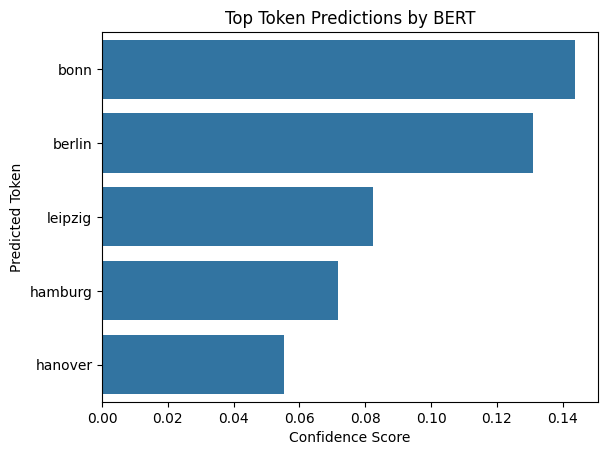

In [ ]:
import pandas as pd

results = fill_mask("The capital of Germany is [MASK].")
df = pd.DataFrame(results)
sns.barplot(x="score", y="token_str", data=df)
plt.title("Top Token Predictions by BERT")
plt.xlabel("Confidence Score")
plt.ylabel("Predicted Token")
plt.show()


- Does BERT reflect societal biases (e.g., gender, race)?
- Are its predictions influenced by stereotypical associations?
- How to mitigate such biases? (e.g., fine-tuning on diverse datasets)


- BERT performs well in understanding masked tokens.
- It relies heavily on context for prediction.
- Limited creativity — not suitable for open-ended generation like GPT.
- Powerful for classification, QA, and entity recognition tasks.
